# Pisa 2012 Data Exploration

## Preliminary Wrangling

This document explores a dataset containing the profiles of 485,490 students who took the 2012 PISA test. 635 variables are evaluated.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
pisa = pd.read_csv('pisa2012.csv',encoding="cp1252", sep=',');

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# high-level overview of data shape and composition
print(pisa.shape)
print(pisa.head(10))

(485490, 636)
   Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   
5           6  Albania     80000  ALB0006  Non-OECD  Albania         1   
6           7  Albania     80000  ALB0006  Non-OECD  Albania         1   
7           8  Albania     80000  ALB0006  Non-OECD  Albania         1   
8           9  Albania     80000  ALB0006  Non-OECD  Albania         1   
9          10  Albania     80000  ALB0005  Non-OECD  Albania         2   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10  

In [4]:
# descriptive statistics for numeric variables
print(pisa.describe())

          Unnamed: 0      SUBNATIO       SCHOOLID        STIDSTD  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201   
std    140149.035431  2.524434e+06     278.563016    6733.144944   
min         1.000000  8.000000e+04       1.000000       1.000000   
25%    121373.250000  2.030000e+06      61.000000    1811.000000   
50%    242745.500000  4.100000e+06     136.000000    3740.000000   
75%    364117.750000  6.880000e+06     291.000000    7456.000000   
max    485490.000000  8.580000e+06    1471.000000   33806.000000   

             ST01Q01        ST02Q01        ST03Q01        ST03Q02  \
count  485490.000000  485438.000000  485490.000000  485490.000000   
mean        9.813323       2.579260       6.558512    1996.070061   
std         3.734726       2.694013       3.705244       0.255250   
min         7.000000       1.000000       1.000000    1996.000000   
25%         9.000000       1.000000       

### What is the structure of your dataset?
PISA 2012 data has the tests of 485,490 student representatives from 64 countries. 635 variables are evaluated.
<br>
The main variables chosen are the type of population: native or emigrant, scores and truancy, among others.

### What are the main features of interest?
- Which continents and countries have the best and worst educational level?
- Immigrant students have a worse educational and social level than native students?
- Is absenteeism related to a worse educational and social level?
- Is wealth related to a better educational level?

### What features do you think will help support your investigation?
I expect that Europe has the highest mean education level, immigrants and natives have the same educational level, immigrants have lower wealth, and truancy is related with lower educational level and lower wealth.

## Univariate Exploration

### Distribution of Scores

(0, 40000)

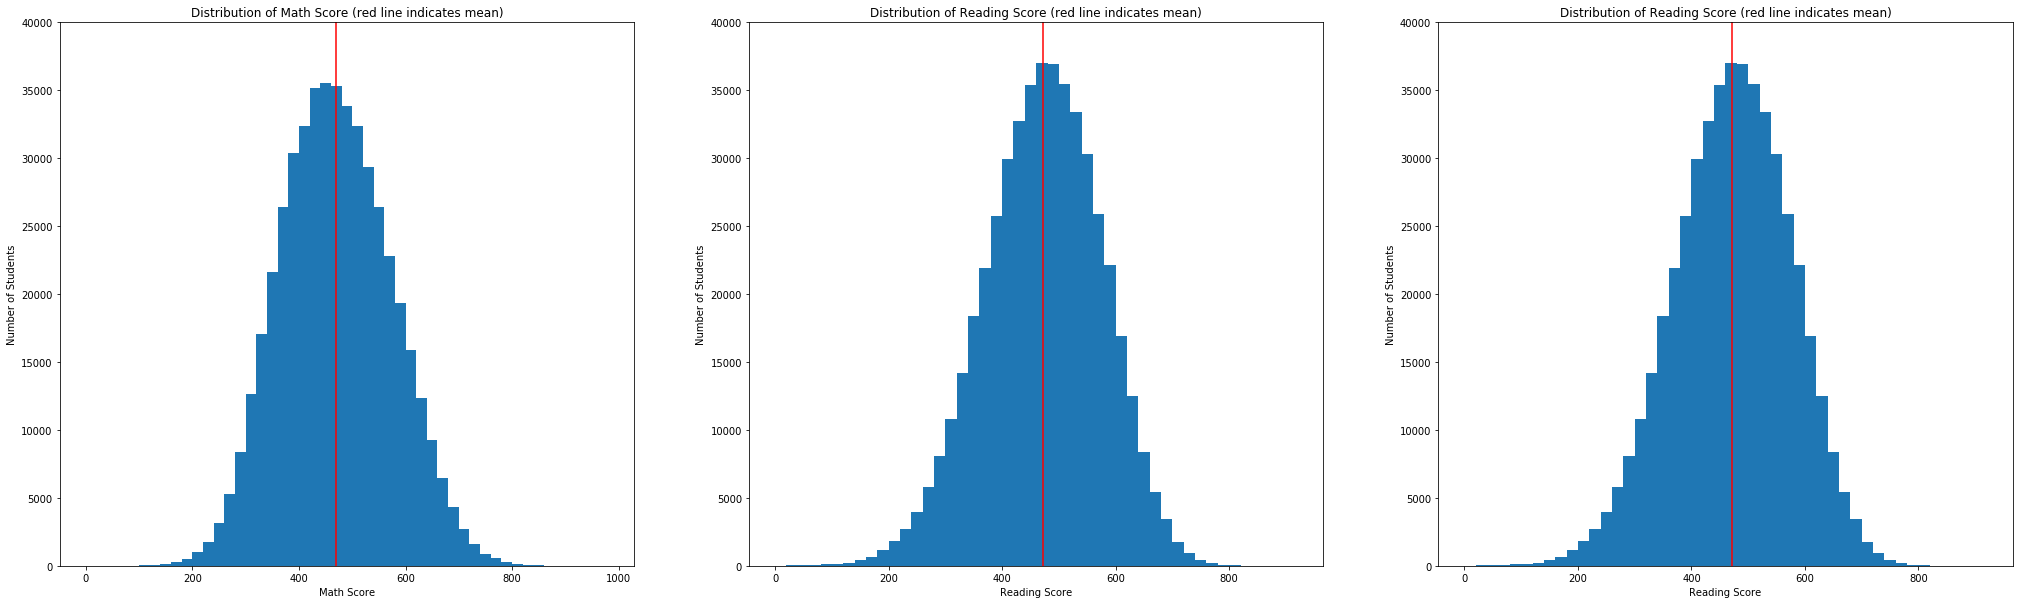

In [5]:
# Look at the distribution of  Scores with a standard-scaled plot
base_color = sb.color_palette()[0]
plt.figure(figsize = [35,10])

plt.subplot(1,3,1)
binsize = 20
bins = np.arange(0, pisa['PV1MATH'].max()+binsize, binsize)
plt.hist(data=pisa, x='PV1MATH', bins = bins)
plt.title('Distribution of Math Score (red line indicates mean)')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.axvline(pisa['PV1MATH'].mean(), color='r')
plt.ylim((0,40000))

plt.subplot(1,3,2)
binsize = 20
bins = np.arange(0, pisa['PV1READ'].max()+binsize, binsize)
plt.hist(data=pisa, x='PV1READ', bins = bins)
plt.title('Distribution of Reading Score (red line indicates mean)')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.axvline(pisa['PV1READ'].mean(), color='r')
plt.ylim((0,40000))

plt.subplot(1,3,3)
binsize = 20
bins = np.arange(0, pisa['PV1READ'].max()+binsize, binsize)
plt.hist(data=pisa, x='PV1READ', bins = bins)
plt.title('Distribution of Reading Score (red line indicates mean)')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.axvline(pisa['PV1READ'].mean(), color='r')
plt.ylim((0,40000))

In [6]:
pisa[['PV1READ','PV1MATH','PV1SCIE']].describe()

,PV1READ,PV1MATH,PV1SCIE
count,485490.000000,485490.000000,485490.000000
mean,472.004640,469.621653,475.769824
std,102.505523,103.265391,101.464426
min,0.083400,19.792800,2.648300
25%,403.600700,395.318600,404.457300
50%,475.455000,466.201900,475.699400
75%,544.502500,541.057800,547.780700
max,904.802600,962.229300,903.338300


The distribution of the marks take on a range of values between 0 and 900 in all the subjects, the unimodal distribution being very similar between them, as well as the average marks (between 469 and 476 points).

### Distribution of Truancy

Text(0, 0.5, 'Truancy')

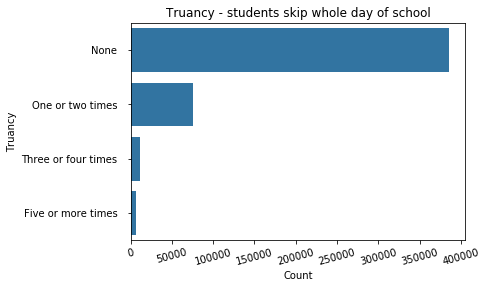

In [7]:
# bar chart of the categorical variable TRUANCY - skip whole school day
base_color = sb.color_palette()[0]
sb.countplot(data=pisa, y='ST09Q01', color=base_color)
plt.xticks(rotation=15)
plt.title('Truancy - students skip whole day of school')
plt.xlabel('Count')
plt.ylabel('Truancy')

Truancy measures the days that a student is absent from class.
<br>
Most of the students are not absent from classes.

## Bivariate exploration

### Relationship between Scores

Text(0, 0.5, 'Read Scores')

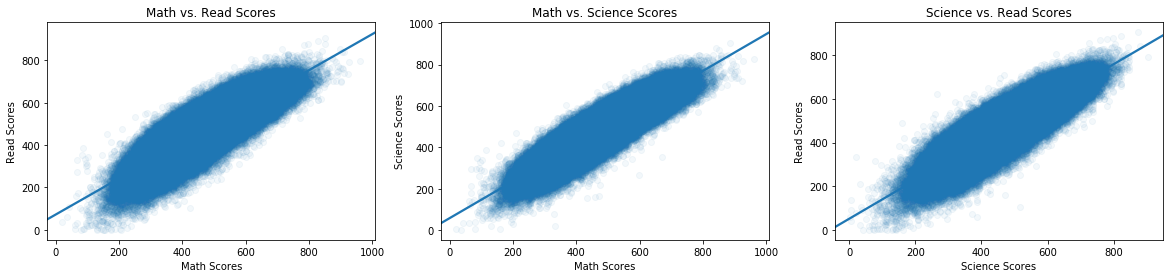

In [8]:
# Scatter Scores
plt.figure(figsize = [20,4])
# scatter score MATH AND READING.
plt.subplot(1,3,1)
sb.regplot(data=pisa,x='PV1MATH',y='PV1READ', scatter_kws={'alpha':1/20})
plt.title('Math vs. Read Scores')
plt.xlabel('Math Scores')
plt.ylabel('Read Scores')

# scatter score MATH AND SCIENCE.
plt.subplot(1,3,2)
sb.regplot(data=pisa,x='PV1MATH',y='PV1SCIE', scatter_kws={'alpha':1/20})
plt.title('Math vs. Science Scores')
plt.xlabel('Math Scores')
plt.ylabel('Science Scores')

# scatter score SCIENCE AND READ.
plt.subplot(1,3,3)
sb.regplot(data=pisa,x='PV1SCIE',y='PV1READ', scatter_kws={'alpha':1/20})
plt.title('Science vs. Read Scores')
plt.xlabel('Science Scores')
plt.ylabel('Read Scores')

Pretty strong relationship between the performance for maths and science and reading.

### Relationship between Scores and Truancy

Text(0, 0.5, 'Truancy')

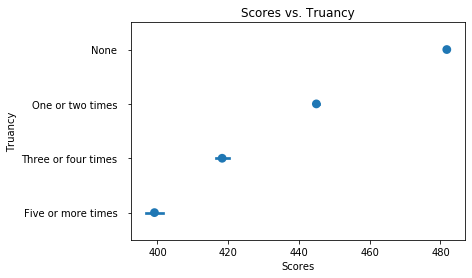

In [9]:
# Create a mean score column
pisa['Score'] = (pisa.PV1MATH + pisa.PV1READ + pisa.PV1SCIE)/3

#  Scores vs. Truancy pointplot
sb.pointplot(data=pisa, x='Score',y='ST09Q01',linestyles="")
plt.title('Scores vs. Truancy')
plt.xlabel('Scores')
plt.ylabel('Truancy')

Text(0, 0.5, 'Scores')

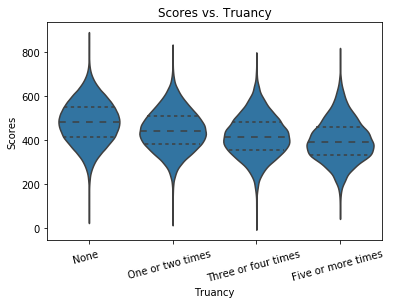

In [10]:
# Scores vs. Truancy violinplot
sb.violinplot(data=pisa,y='Score',x='ST09Q01',color=base_color, inner='quartile')
plt.xticks(rotation=15)
plt.title('Scores vs. Truancy')
plt.xlabel('Truancy')
plt.ylabel('Scores')

The shape of the distributions are quite similar.
<br>
There is a positive correlation between those who score the most and the few who are absent from school.

### Relationship between Scores and type of population

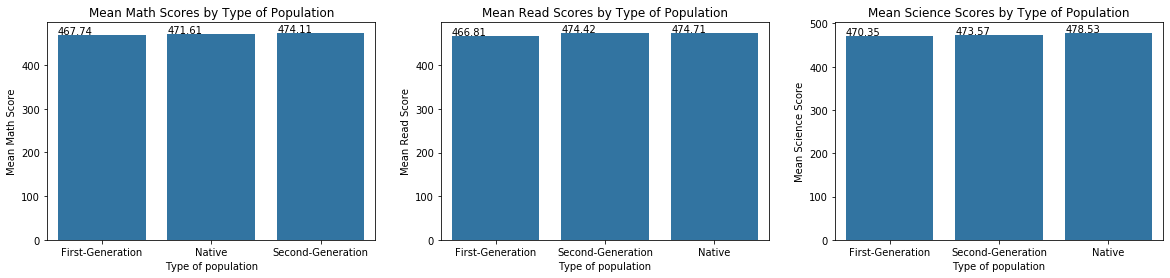

In [11]:
# Mean Scores by type of population
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,4])

# Type of population, IMMIG, VS Math Score, PV1MATH
plt.subplot(1,3,1)
pop_math = pisa.groupby('IMMIG').PV1MATH.mean().rename('Mean_Math_Score').reset_index().sort_values('Mean_Math_Score')
ax = sb.barplot(data= pop_math, x='IMMIG', y='Mean_Math_Score', color= base_color)
plt.title('Mean Math Scores by Type of Population')
plt.xlabel('Type of population')
plt.ylabel('Mean Math Score')


for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

# Type of population, IMMIG, VS Read Score, PV1READ
plt.subplot(1,3,2)
pop_math = pisa.groupby('IMMIG').PV1READ.mean().rename('Mean_Read_Score').reset_index().sort_values('Mean_Read_Score')
ax = sb.barplot(data= pop_math, x='IMMIG', y='Mean_Read_Score', color= base_color)
plt.title('Mean Read Scores by Type of Population')
plt.xlabel('Type of population')
plt.ylabel('Mean Read Score')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    
# Type of population, IMMIG, VS Science Score, PV1SCIE
plt.subplot(1,3,3)
pop_math = pisa.groupby('IMMIG').PV1SCIE.mean().rename('Mean_Science_Score').reset_index().sort_values('Mean_Science_Score')
ax = sb.barplot(data= pop_math, x='IMMIG', y='Mean_Science_Score', color= base_color)
plt.title('Mean Science Scores by Type of Population')
plt.xlabel('Type of population')
plt.ylabel('Mean Science Score')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

We have calculated the average score for each subject and type of population.
<br>
First Generation is the type with the lowest scores in all the subjects.
<br>
Natives are the type with the highest scores in Reading and Science.

Text(0, 0.5, 'Science Score')

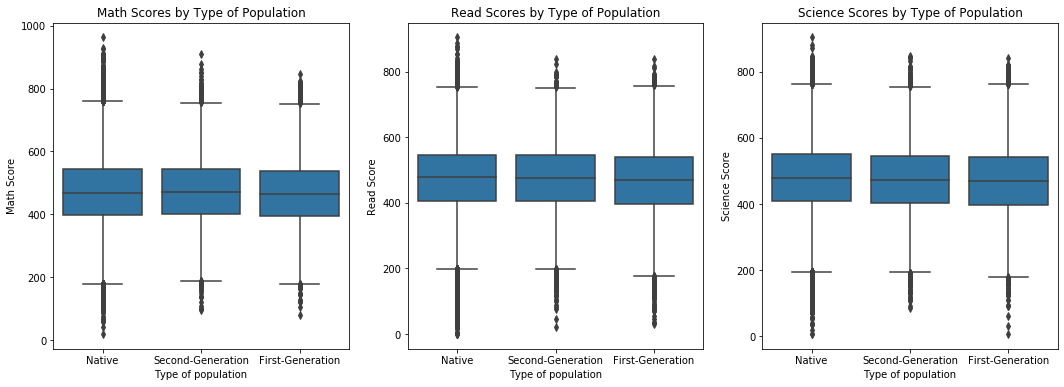

In [12]:
# Box plots scores by type of population
base_color = sb.color_palette()[0]
plt.figure(figsize = [18,6])

# Type of population, IMMIG, VS Math Score, PV1MATH
plt.subplot(1,3,1)
sb.boxplot(data= pisa, x='IMMIG', y='PV1MATH', color= base_color)
plt.title('Math Scores by Type of Population')
plt.xlabel('Type of population')
plt.ylabel('Math Score')

# Type of population, IMMIG, VS Read Score, PV1READ
plt.subplot(1,3,2)
sb.boxplot(data= pisa, x='IMMIG', y='PV1READ', color= base_color)
plt.title('Read Scores by Type of Population')
plt.xlabel('Type of population')
plt.ylabel('Read Score')

# Type of population, IMMIG, VS Science Score, PV1SCIE
plt.subplot(1,3,3)
sb.boxplot(data= pisa, x='IMMIG', y='PV1SCIE', color= base_color)
plt.title('Science Scores by Type of Population')
plt.xlabel('Type of population')
plt.ylabel('Science Score')

In [13]:
# Mean Score by Type of Population in all the subjects.
mean_total_score_pop = (pisa.groupby('IMMIG').PV1MATH.mean() + pisa.groupby('IMMIG').PV1READ.mean() + pisa.groupby('IMMIG').PV1SCIE.mean())/3
mean_total_score_pop = mean_total_score_pop.rename('Mean_Scores').reset_index().sort_values('Mean_Scores')
mean_total_score_pop

,IMMIG,Mean_Scores
0,First-Generation,468.297824
2,Second-Generation,474.035481
1,Native,474.949453


Native are the best students, followed by Second-Generation.

As we have seen that the natives are the students with the best grades, we will see what variables are correlated with the immigrants (first-generation and second-generation).

(14.5, -0.5)

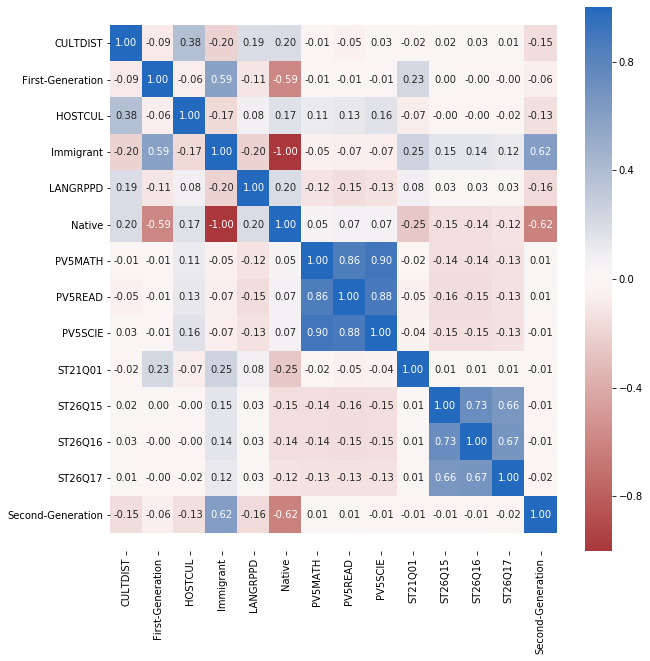

In [14]:
# We bring Second-Generation and First-Generation together

# FIND FEATURES CORRELATEED WITH IMMIGRANTS
# Exploring correlation matrix with IMMIGRANTS
#1. create a column for immigrants (just two: native and immigrants)
#2. correlations > 0.1

#1.1 creating immigration dummies
immig_dummies=pd.get_dummies(pisa['IMMIG'])

# 1.2.create new column. new column is a duplicate of Native column
# replace 1 for 0 andd 0 for 1 in duplicate of native column
immig_dummies['Immigrant'] = immig_dummies['Native']

# 1.3 create immigrant column
immig_dummies['Immigrant'] = immig_dummies['Immigrant'].map({0: 1, 1:0})

#1.4 concat dummies with pisa
pisa=pd.concat([pisa,immig_dummies],axis=1)
# 2. make correlation matrix
corrMatrix = pisa.corr()
#2.1 Get all variables that have a correlation above 0.07 with "immigrant".
immig_corr = corrMatrix.Immigrant[abs(corrMatrix.Immigrant)>0.10]
#2.2 get list of columns
col_list_ic = immig_corr.index.tolist()
#2.3extend list to include science and maths scpres
col_list_ic.extend(["PV5SCIE","PV5MATH",'PV5READ'])
col_list_ic.sort()
#2.4make correlation matrix
corrMatrix_immigrant = pisa[col_list_ic].corr()
#2.5 plot heatmap of features correlated with gender
plt.figure(figsize = [10,10])

ht = sb.heatmap(corrMatrix_immigrant, annot = True,cmap = 'vlag_r',fmt = '.2f',center = 0)
ht.set_ylim(len(corrMatrix_immigrant)+0.5, -0.5)

- Immigrants observe 20% more differences between Host and Heritage Cultures (variable CULTDIST).
- Immigrants feel that they adapt 17% worse to the new culture (HOSTCULT).
- Immigrants arrive in the country 0.25 years later than natives who return to their country (variable ST21Q01).
- Immigrants have around 14% more national houshold possession items than natives (ST26Q15, ST26Q16, ST26Q17 variables).
- Immigrants are 20% more reluctant to use preferably the heritage language in language reception and production (variable LANGRPPD).

## Multivariate Exploration

### Relationship between Total Scores, Country and Type of Population

(0, 700)

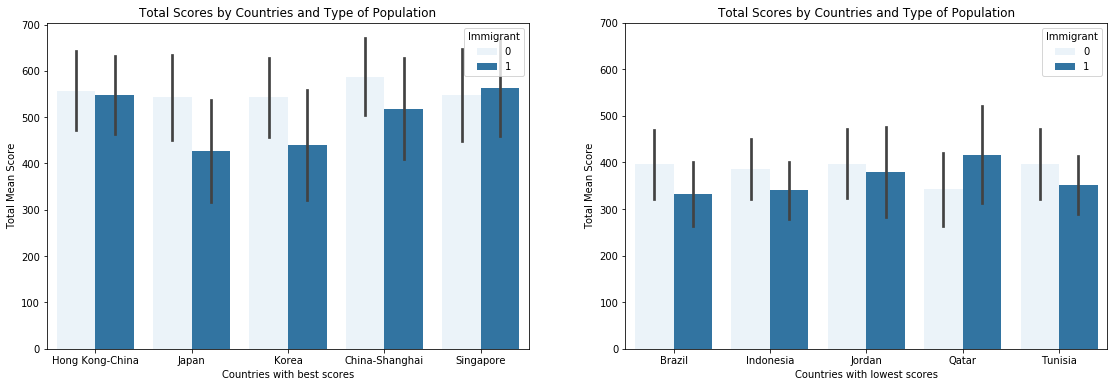

In [15]:
# get top and worst 'Total score' countries 
score_countries = pisa.groupby('CNT').Score.mean().sort_values(ascending=False)
top_score_countries = score_countries.iloc[0:5]
worst_score_countries = score_countries.iloc[-6:-1]

# get index
top_score_countries_df = pisa[pisa['CNT'].isin(top_score_countries.index)]
worst_score_countries_df = pisa[pisa['CNT'].isin(worst_score_countries.index)]

# rename Type of population
top_score_countries_df.replace

# plot
base_color = sb.color_palette()[0]
plt.figure(figsize = [19,6])

plt.subplot(1,2,1)
sb.barplot(data=top_score_countries_df,x='CNT',y='Score',hue='Immigrant', ci='sd', color= base_color)
plt.title('Total Scores by Countries and Type of Population')
plt.xlabel('Countries with best scores')
plt.ylabel('Total Mean Score')
plt.legend(title='Immigrant')

plt.subplot(1,2,2)
sb.barplot(data= worst_score_countries_df,x='CNT',y='Score',hue='Immigrant', ci='sd', color= base_color)
plt.title('Total Scores by Countries and Type of Population')
plt.xlabel('Countries with lowest scores')
plt.ylabel('Total Mean Score')
plt.legend(title='Immigrant')
plt.ylim((0,700))

*Legend clarification for Immigrant:*
- *0 means no immigrant, that is, Native.*
- *1 means Immigrant (first or second generation).*

<br>
There is a difference of more than 100 points between the highest and lowest scores countries.
<br>
Usually, natives get a higher total score in countries. However, Singapore and Qatar have immigrants with higher scores.
<br>
All top score countries are Asian but 3 of the worst scored countries are also asians. So, this continent has the highest and lowest score cuontries.
<br>
We could see if these ones are related with wealth. Are top score countries wealthier than worst score countries?

Text(0, 0.5, 'Worst Score Countries')

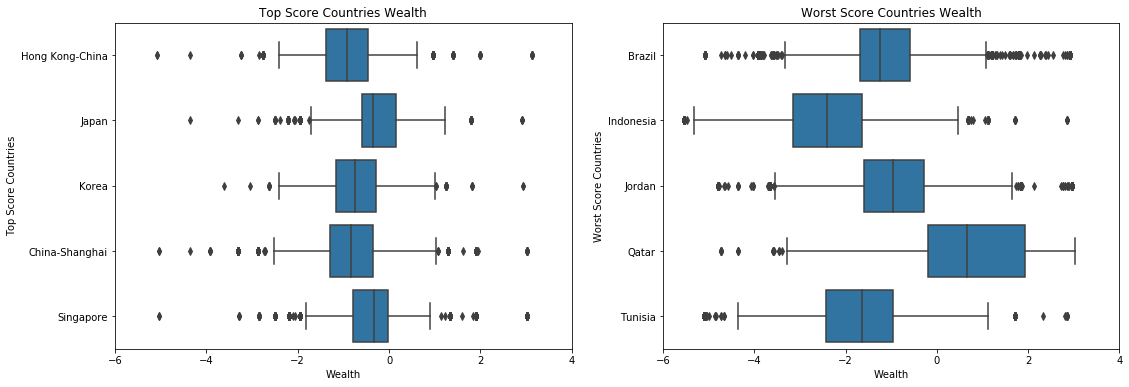

In [16]:
# Looking at top score countries by wealth
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
sb.boxplot(data=pisa[pisa['CNT'].isin(top_score_countries.index)],y='CNT',x='WEALTH',color=base_color)
plt.xlim((-6,4))
plt.title('Top Score Countries Wealth')
plt.xlabel('Wealth')
plt.ylabel('Top Score Countries')

# Looking at worst score countries by wealth
plt.subplot(1,2,2)
sb.boxplot(data=pisa[pisa['CNT'].isin(worst_score_countries.index)],y='CNT',x='WEALTH',color=base_color)
plt.xlim((-6,4))
plt.title('Worst Score Countries Wealth')
plt.xlabel('Wealth')
plt.ylabel('Worst Score Countries')

Countries with fewer scores have less wealth, except Qatar.
<br>
So there is a correlation in most cases.

### Relationships between Wealth and Type of Population

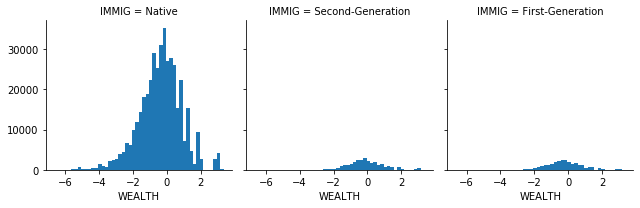

In [17]:
# Weatlh distribution by type of population.
bin_edges = np.arange(pisa['WEALTH'].min(), pisa['WEALTH'].max()+1/5, 1/5)
g = sb.FacetGrid(data = pisa, col = 'IMMIG')
g.map(plt.hist, "WEALTH", bins = bin_edges)

Natives have a higher poverty rate than immigrants, although in small numbers.

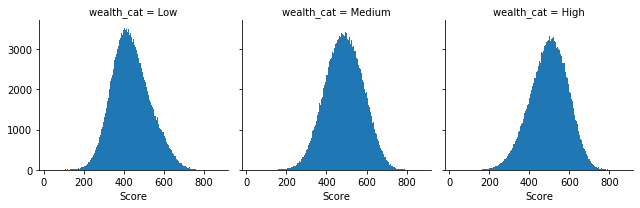

In [18]:
# Score distribution by wealth(creation categories low,med & hihgh).
pisa["wealth_cat"] = pd.qcut(pisa.WEALTH, 3, labels=["Low","Medium","High"])
bin_edges = np.arange(pisa['Score'].min(), pisa['Score'].max()+5, 5)
g = sb.FacetGrid(data = pisa, col = 'wealth_cat')
g.map(plt.hist, "Score", bins = bin_edges)

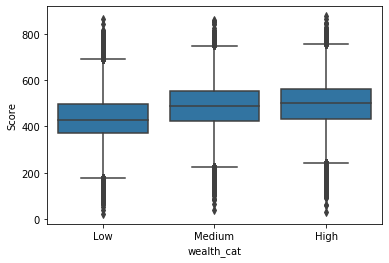

In [19]:
sb.boxplot(data=pisa,y='Score',x='wealth_cat',color=base_color)

The higher the wealth the scores increase. 
<br>
There is a small positive correlation between wealth and scores.

Text(0.5, 20.80000000000002, 'Wealth')

<Figure size 1080x288 with 0 Axes>

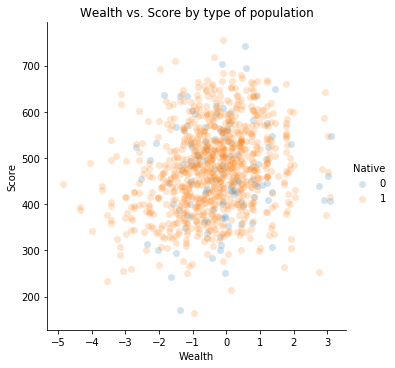

In [20]:
# Scatter Score vs. Wealth 
samples = np.random.choice(pisa.shape[0],1000,replace=False)
pisa_samp = pisa.loc[samples,:]
plt.figure(figsize = [15,4])

g = sb.FacetGrid(pisa_samp, hue="Native", height=5)
g.map(plt.scatter, "WEALTH", "Score", s=50, alpha=.2, linewidth=.5, edgecolor="white")
g.add_legend();
plt.title('Wealth vs. Score by type of population')
plt.xlabel('Wealth')

*Legend clarification for Native:*
- *0 means immigrant (first or second generation).*
- *1 means native.*


Immigrants have a much narrower range of wealth than Natives.
<br>
The highest native and immigrant scores occur in the same wealth range.
<br>
Immigrants and natives scores are independent of wealth.

### Relationship between Scores and diff. in Type of Population

In [21]:
# Mean Scores by Type of Population and difference in Scores by Type of Population
scores = pisa[["PV1MATH","PV1READ","PV1SCIE","Score","Native"]].groupby(by=['Native']).mean().reset_index()
scores_diff = {'Native':'Diff','PV1MATH':scores.PV1MATH[1]-scores.PV1MATH[0],'PV1READ':scores.PV1READ[1]-scores.PV1READ[0],'PV1SCIE':scores.PV1SCIE[1]-scores.PV1SCIE[0],'Score':scores.Score[1]-scores.Score[0]}
scores = scores.append(scores_diff, ignore_index=True)
scores

,Native,PV1MATH,PV1READ,PV1SCIE,Score
0,0,457.461188,455.444138,458.848974,457.251433
1,1,471.607173,474.708583,478.532603,474.949453
2,Diff,14.145985,19.264445,19.683629,17.698020


On average, the difference in grade for natives and immigrants is 17.7 points.
<br>
The smallest difference between natives and immigrants is in Maths.
<br>
Natives always score higher in all subjects. 
<br>
How affect this if we include Truancy variable?

### Relationship between Truancy and Scores

Text(0.5, 0, 'Truancy')

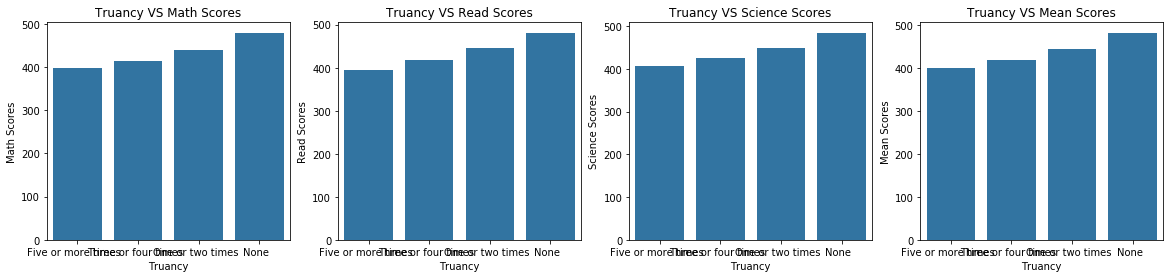

In [22]:
# Truancy vs. Scores
truancy_scores = pisa[["PV1MATH","PV1READ","PV1SCIE","Score","ST09Q01"]].groupby(by=["ST09Q01"]).mean().reset_index()
plt.figure(figsize = [20,4])
plt.subplot(1,4,1)
sb.barplot(y='PV1MATH',x="ST09Q01",data=truancy_scores.sort_values('PV1MATH').reset_index(),color = base_color)
plt.title("Truancy VS Math Scores")
plt.ylabel("Math Scores")
plt.xlabel("Truancy")

plt.subplot(1,4,2)
sb.barplot(y='PV1READ',x="ST09Q01",data=truancy_scores.sort_values('PV1READ').reset_index(),color = base_color)
plt.title("Truancy VS Read Scores")
plt.ylabel("Read Scores")
plt.xlabel("Truancy")

plt.subplot(1,4,3)
sb.barplot(y='PV1SCIE',x="ST09Q01",data=truancy_scores.sort_values('PV1SCIE').reset_index(),color = base_color)
plt.title("Truancy VS Science Scores")
plt.ylabel("Science Scores")
plt.xlabel("Truancy")

plt.subplot(1,4,4)
sb.barplot(y='Score',x="ST09Q01",data=truancy_scores.sort_values('Score').reset_index(),color = base_color)
plt.title("Truancy VS Mean Scores")
plt.ylabel("Mean Scores")
plt.xlabel("Truancy")

There is a negative correlation between truancy and scores in all subjects.
<br>
Will this correlation continue to be negative if we analyze by type of population?
Will natives and immigrants behave differently?

### Relationship between Type of Population, Truancy and Scores

In [23]:
#calculate mean score for native, mean score for immigrant, and difference. 
immig_truancy_scores = pisa[["PV1MATH","PV1READ","PV1SCIE","Score","ST09Q01","Native"]].groupby(by=["ST09Q01","Native"]).mean().reset_index()
#pivot to have seperate immig columns
immig_truancy_scores_diff=immig_truancy_scores.pivot(index="ST09Q01",columns='Native', values=["PV1MATH","PV1READ","PV1SCIE","Score"])

for col in ["PV1MATH","PV1READ","PV1SCIE","Score"]:
    immig_truancy_scores_diff[col+'_diff']=immig_truancy_scores_diff[col][1] - immig_truancy_scores_diff[col][0]
immig_truancy_scores_diff.head()

PV1MATH                 PV1READ              \
Native                          0           1           0           1   
ST09Q01                                                                 
Five or more times     384.947759  400.655228  371.798994  397.767136   
None                   471.321363  480.640018  469.763583  482.926207   
One or two times       433.345241  439.879857  438.911714  447.697156   
Three or four times    399.416831  415.824723  396.711637  420.391403   

                          PV1SCIE                   Score              \
Native                          0           1           0           1   
ST09Q01                                                                 
Five or more times     385.956122  409.867642  380.900958  402.763335   
None                   471.713334  486.652056  470.932760  483.406094   
One or two times       441.156658  450.630374  437.804537  446.069129   
Three or four times    406.752282  428.071724  400.960250  421.429284   

                      PV1MATH_diff PV1READ_diff PV1SCIE_diff Score_diff  
Native                                                                   
ST09Q01                                                                  
Five or more times       15.707469    25.968143    23.911520  21.862377  
None                      9.318655    13.162625    14.938721  12.473333  
One or two times          6.534616     8.785442     9.473716   8.264592  
Three or four times      16.407892    23.679767    21.319443  20.469034

(0, 26)

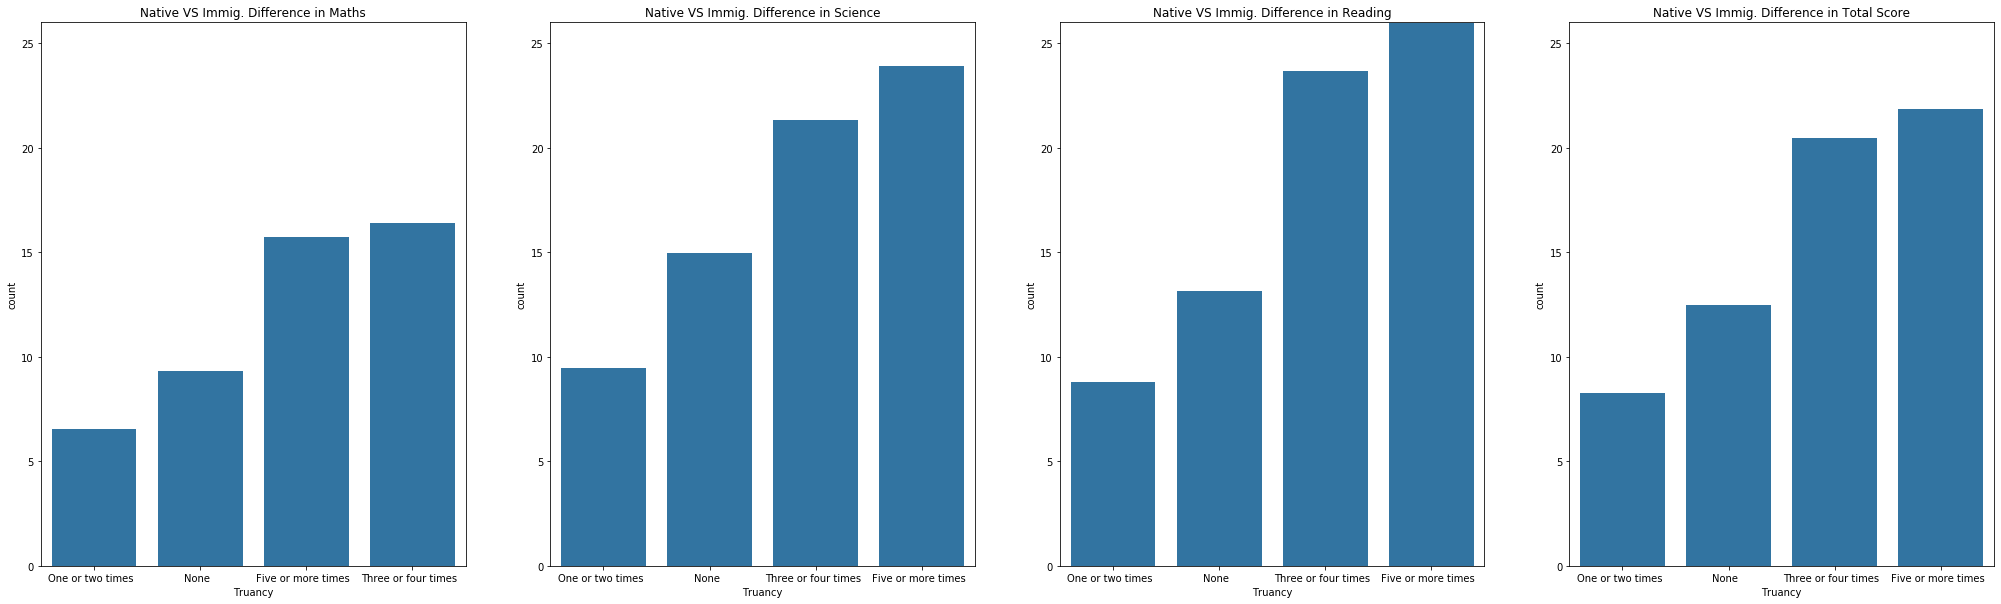

In [24]:
# Native - Immigrants scores vs. Truancy 
plt.figure(figsize = [35,10])

base_color = sb.color_palette()[0]
immig_diff="PV1MATH_diff"
plt.subplot(1,4,1)
gc = sb.barplot(y=immig_diff,x="ST09Q01",data=immig_truancy_scores_diff.sort_values(immig_diff).reset_index(),color = base_color)
plt.title("Native VS Immig. Difference in Maths")
plt.ylabel("count")
plt.xlabel("Truancy")
plt.ylim((0,26))

immig_diff="PV1SCIE_diff"
plt.subplot(1,4,2)
gc = sb.barplot(y=immig_diff,x="ST09Q01",data=immig_truancy_scores_diff.sort_values(immig_diff).reset_index(),color = base_color)
plt.title("Native VS Immig. Difference in Science")
plt.ylabel("count")
plt.xlabel("Truancy")
plt.ylim((0,26))

immig_diff="PV1READ_diff"
plt.subplot(1,4,3)
gc = sb.barplot(y=immig_diff,x="ST09Q01",data=immig_truancy_scores_diff.sort_values(immig_diff).reset_index(),color = base_color)
plt.title("Native VS Immig. Difference in Reading")
plt.ylabel("count")
plt.xlabel("Truancy")
plt.ylim((0,26))

immig_diff="Score_diff"
plt.subplot(1,4,4)
gc = sb.barplot(y=immig_diff,x="ST09Q01",data=immig_truancy_scores_diff.sort_values(immig_diff).reset_index(),color = base_color)
plt.title("Native VS Immig. Difference in Total Score")
plt.ylabel("count")
plt.xlabel("Truancy")
plt.ylim((0,26))

I am analyzing the difference in score between Natives and Immigrants according to their truancy.
All the differences are positive, so the natives get better grades on average in all the subjects.
There is less difference in scores between natives and immigrants who skip classes once or twice.
If classes are skipped more than once or twice, the difference in scores increases between natives and immigrants.

The differences in Science are the most notable for those who do not skip any class.
The differences in Reading are the most noticeable for those who skip more classes.

### Relationship between Score and Wealth

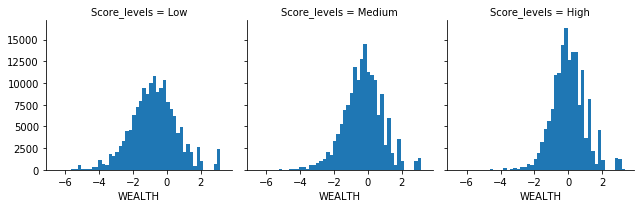

In [25]:
# Wealth distribution by total score
pisa['Score_levels'] = pd.qcut(pisa.Score, 3, labels=['Low','Medium','High'])
bin_edges = np.arange(pisa.WEALTH.min(), pisa.WEALTH.max()+1/5, 1/5)
g = sb.FacetGrid(data=pisa, col='Score_levels')
g.map(plt.hist,'WEALTH', bins=bin_edges)

Students with lower scores have less wealth.
<br>
The other students have a similar distribution of wealth, regardless of whether they score average or high.

### Relationship between Score and Wealth and Type of population and Truancy

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Wealth vs. Score by Truancy and type of population')

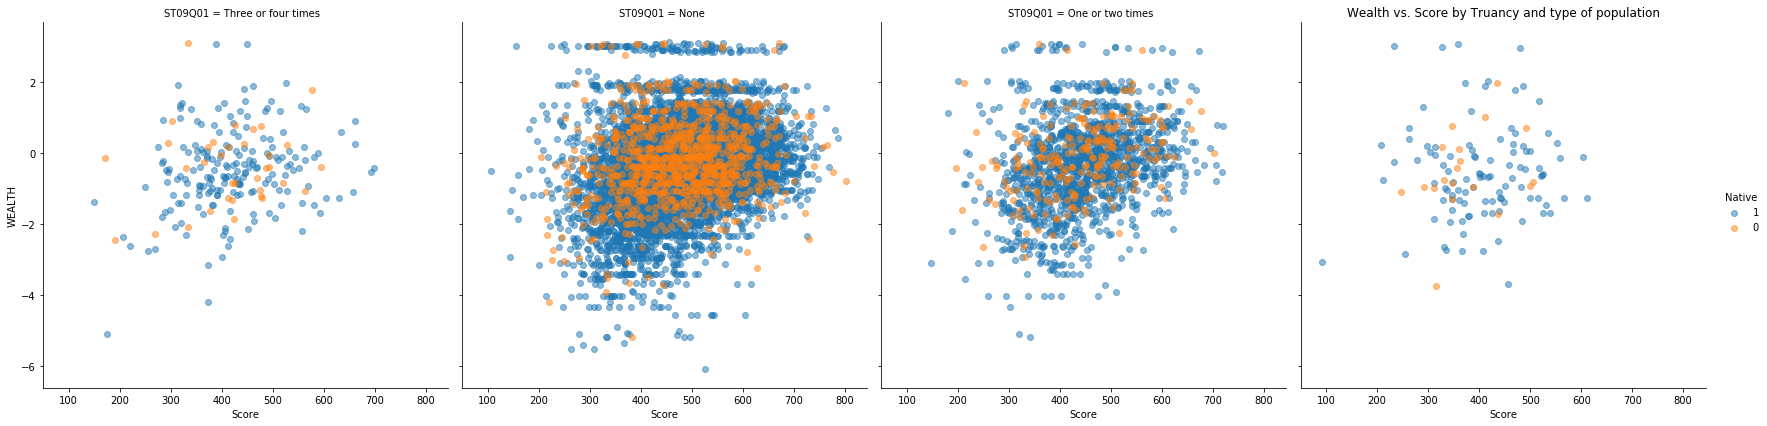

In [26]:
# Scatterplots of wealth vs Score split by Truancy and Type of Population
samples = np.random.choice(pisa.shape[0],10000,replace=False)
pisa_samp = pisa.loc[samples,:]

truancy_order = ['None','One or two times','Three or four times','Five or more times']
truancy_cat = pd.api.types.CategoricalDtype(ordered=True, categories=truancy_order)
pisa.ST09Q01.astype(truancy_cat)

g = sb.FacetGrid(data = pisa_samp, hue='Native',col = 'ST09Q01', hue_order=[1,0], size = 6)
g.map(sb.regplot, "Score", 'WEALTH', fit_reg = False, scatter_kws = {'alpha' : 0.5})
g.add_legend();
plt.title('Wealth vs. Score by Truancy and type of population')

*Legend clarification for Native:*
- *0 means immigrant (first or second generation).*
- *1 means native.*


Most of the respondents are in a degree of wealth from -2 to 2.
<br>
Wealth is not correlated with scores or population type.
<br>
We can say that the natives have a greater negative wealth interval.
<br>
There is a negative correlation between absenteeism and score. The more absenteeism the less note.